# Stock Market Analysis and Prediction- Canadian Banks' Stocks

#### The Data for the Stock Market have been obtained from Yahoo Finance.

### Introduction

In this project, Stock Market Analysis and Prediction will be performed for Four Canadian Banks using data provided by Yahoo Finance. Pandas is used to get stock information, visualize different aspects of it, and finally perform risk analysis on the basis of its performance history. Also using the Monte Carlo method the future stock prices are pridicted.

In [3]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
# For division
from __future__ import division

# For reading stock data from yahoo
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

### Section 1 - Basic Analysis of Stock market

Here the stock information will be obtained using pandas from Yahoo Finance for four Canadian Banks including The Toronto-Dominion Bank (TD), Royal Bank of Canada (RY), Bank of Montreal (BMO) and the Bank of Nova Scotia (BNS) and some analysis will be performed.

In [6]:
# List of Canadian Banks for analytics of their stocks

bank_list = ['TD', 'RY', 'BMO', 'BNS']

# setting up Start and End time for data retrieving
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for retrieving Yahoo finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

for stock in bank_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [7]:
#Showing the head of the TD stock data
TD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-29,54.830002,54.240002,54.810001,54.330002,1214300.0,51.548965
2019-04-01,55.630001,54.560001,54.750000,55.529999,1447800.0,52.687538
2019-04-02,55.889999,55.400002,55.540001,55.650002,998400.0,52.801395
2019-04-03,56.189999,55.770000,55.910000,55.860001,1200100.0,53.000641
2019-04-04,56.160000,55.810001,55.880001,56.000000,816700.0,53.133476


In [8]:
#stats for TD stock data
TD.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,55.757381,55.025754,55.389881,55.405635,1.351904e+06,54.220396
std,3.924616,4.580989,4.254503,4.256069,9.803793e+05,4.013616
min,36.799999,33.740002,36.029999,33.830002,4.323000e+05,33.830002
25%,55.659999,55.029999,55.355000,55.347499,8.194750e+05,53.463537
50%,56.629999,56.045000,56.299999,56.385000,1.026800e+06,55.227501
75%,57.477501,56.957500,57.235001,57.325000,1.378400e+06,56.487014
max,59.549999,59.200001,59.480000,59.410000,7.550800e+06,57.531891


In [9]:
# General Info for TD stock data
TD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-03-29 to 2020-03-27
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


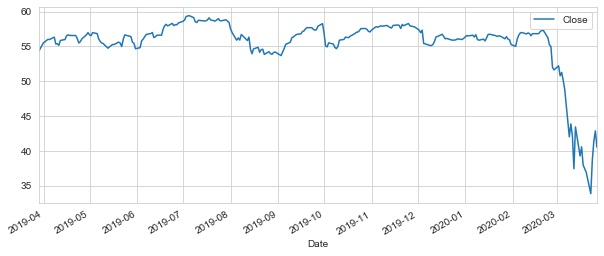

In [10]:
# Plotting the closing price during past year for TD stock data 
TD['Close'].plot(legend=True, figsize=(10,4))

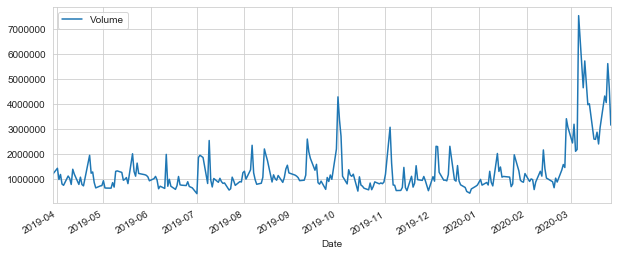

In [11]:
#Plotting the total volume of stock being traded each day over the past year for TD stock data 
TD['Volume'].plot(legend=True, figsize=(10,4))

In [13]:
# plotting moving averages for different number of days
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    TD[column_name] = TD['Close'].rolling(ma).mean()

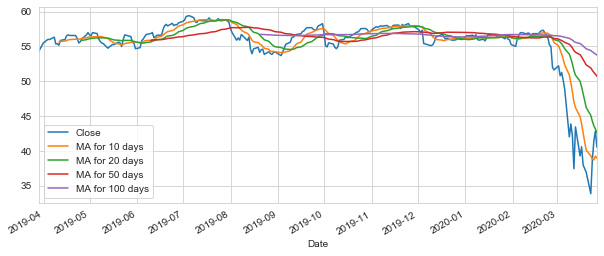

In [14]:
#Plotting different Moving Averages for TD stock data
TD[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

### Section 2 - Daily Return Analysis and calculation

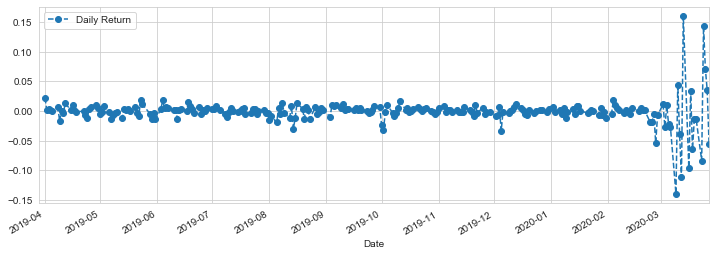

In [15]:
#pct_change is used to find the percent change for each day
TD['Daily Return'] = TD['Close'].pct_change()

# Lets plot the daily return percentage
TD['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

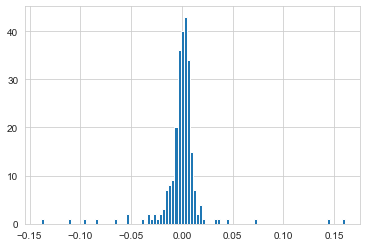

In [18]:
# Plotting average daily return only with histogram
TD['Daily Return'].hist(bins=100)

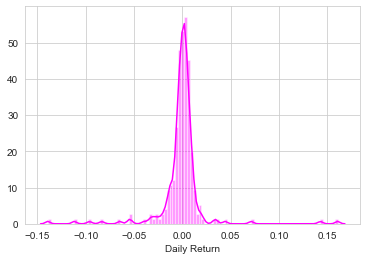

In [22]:

# using of dropna() here because the NaN values can't be read by seaborn
sns.distplot(TD['Daily Return'].dropna(), bins=100, color='magenta')

In [23]:
# Grab all the closing prices for the bank stock list into one DataFrame
closingprice_df = DataReader(bank_list, 'yahoo', start, end)['Close']

In [24]:
#Showing the head of the closingprice_df
closingprice_df.head(10)

Symbols,BMO,BNS,RY,TD
Date,,,,
2019-03-29,74.820000,53.279999,75.550003,54.330002
2019-04-01,76.209999,53.369999,76.949997,55.529999
2019-04-02,76.519997,53.040001,77.230003,55.650002
2019-04-03,76.570000,53.240002,77.419998,55.860001
2019-04-04,76.580002,53.400002,77.449997,56.000000
2019-04-05,76.410004,53.299999,77.360001,55.980000
2019-04-08,76.769997,53.500000,77.650002,56.320000
2019-04-09,76.459999,53.330002,77.370003,55.340000
2019-04-10,76.570000,53.529999,77.639999,55.380001


In [25]:
# make a new bank returns DataFrame
bank_returns = closingprice_df.pct_change()

In [26]:
#Showing the head of the bank_returns
bank_returns.head()

Symbols,BMO,BNS,RY,TD
Date,,,,
2019-03-29,NaN,NaN,NaN,NaN
2019-04-01,0.018578,0.001689,0.018531,0.022087
2019-04-02,0.004068,-0.006183,0.003639,0.002161
2019-04-03,0.000653,0.003771,0.002460,0.003774
2019-04-04,0.000131,0.003005,0.000387,0.002506


#### Checking correlations

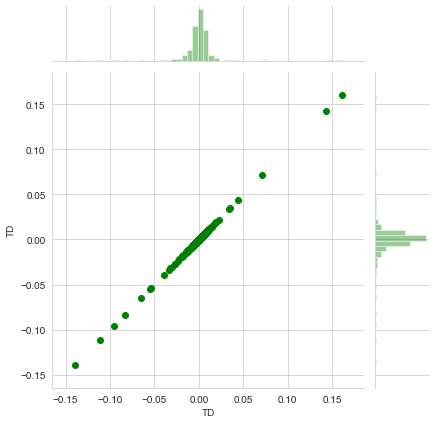

In [27]:
# Comparing TD to itself should show a perfectly linear relationship
sns.jointplot('TD','TD',bank_returns, kind='scatter',color='green')

If two stocks are perfectly correlated with each other a linear relationship bewteen their daily return values should be observed.

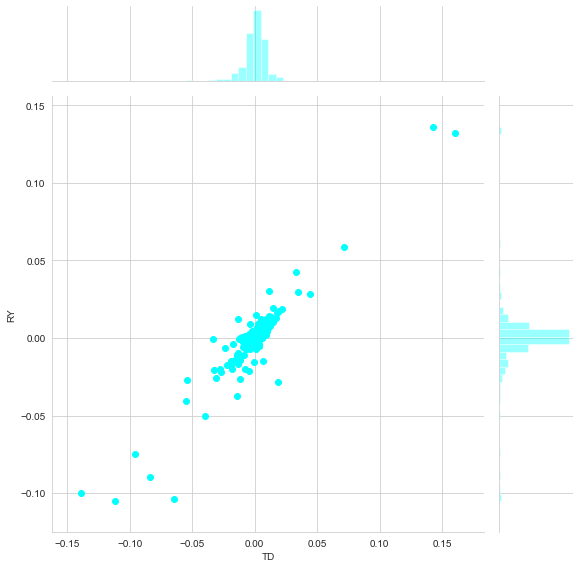

In [29]:
#using joinplot to compare the daily returns of TD and RBC(RY)

sns.jointplot('TD','RY', bank_returns, kind='scatter', height=8, color='cyan')

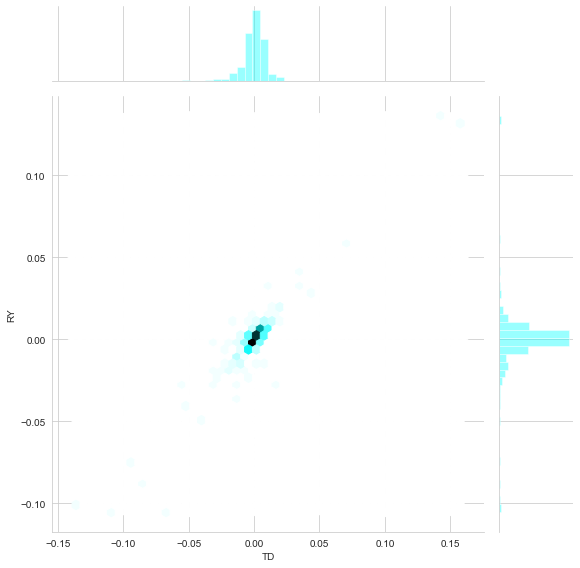

In [31]:
# with Hex plot
sns.jointplot('TD','RY', bank_returns, kind='hex', height=8, color='cyan')

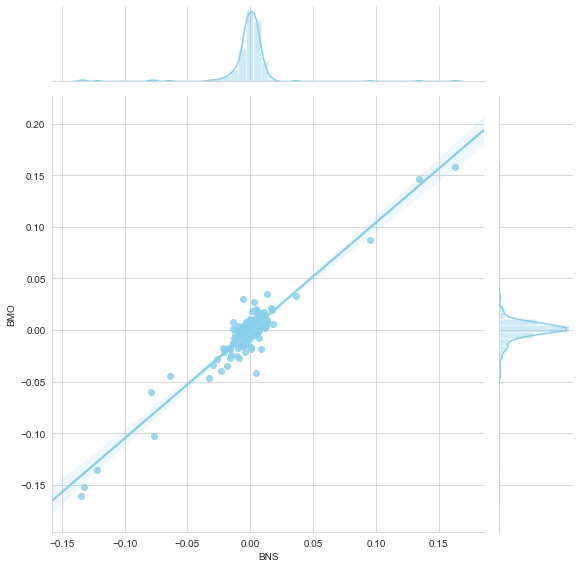

In [33]:
# Lets check out for the Bank of Nova Scitia (BNS) and Bank of Montreal (BMO) with reg jointplot
sns.jointplot('BNS','BMO', bank_returns, kind='reg', height=8, color='skyblue')

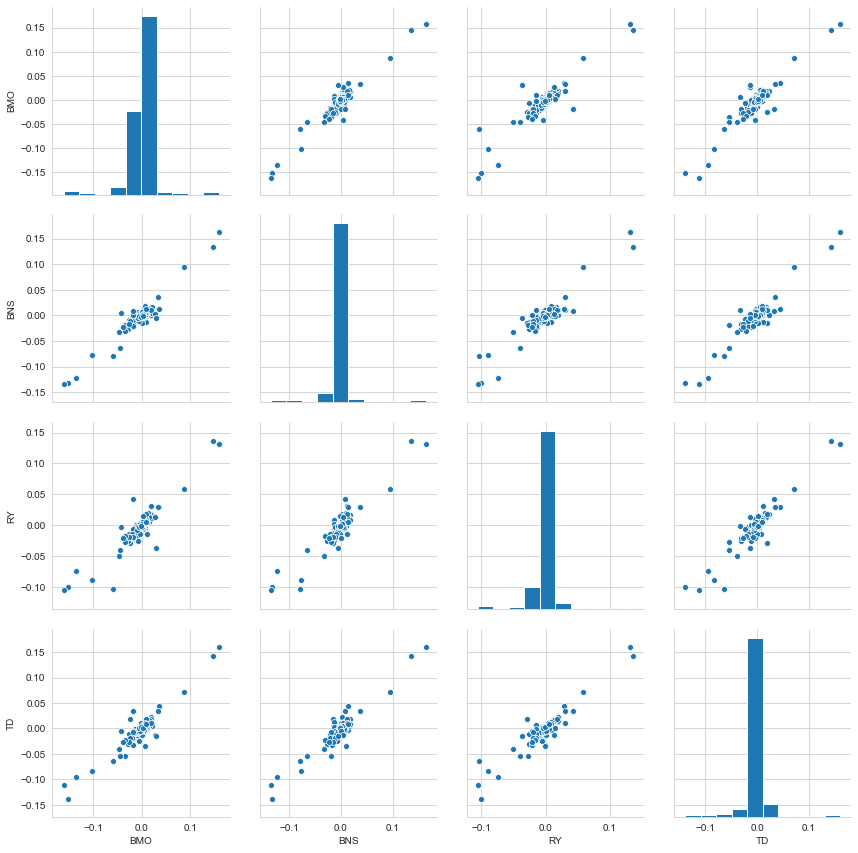

In [34]:
#calling pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(bank_returns.dropna(), height=3)

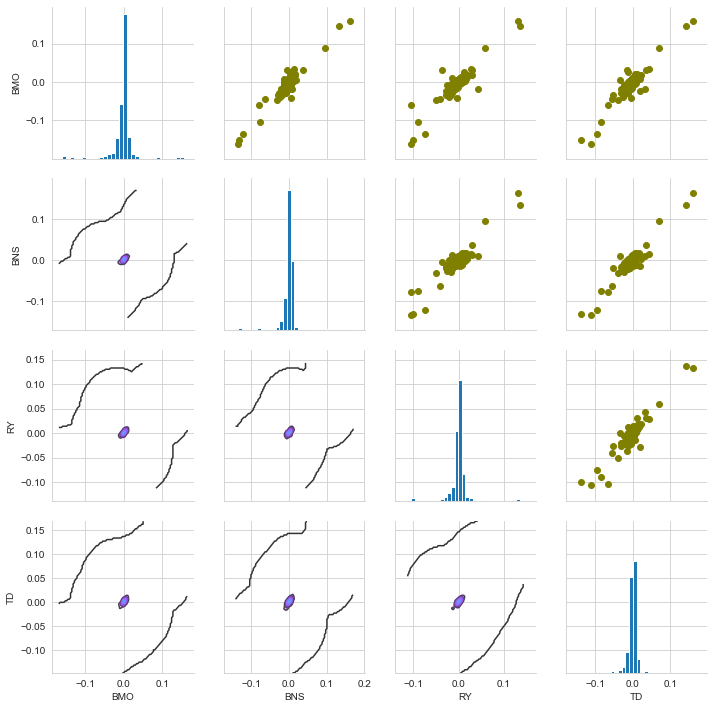

In [37]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(bank_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color='olive')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

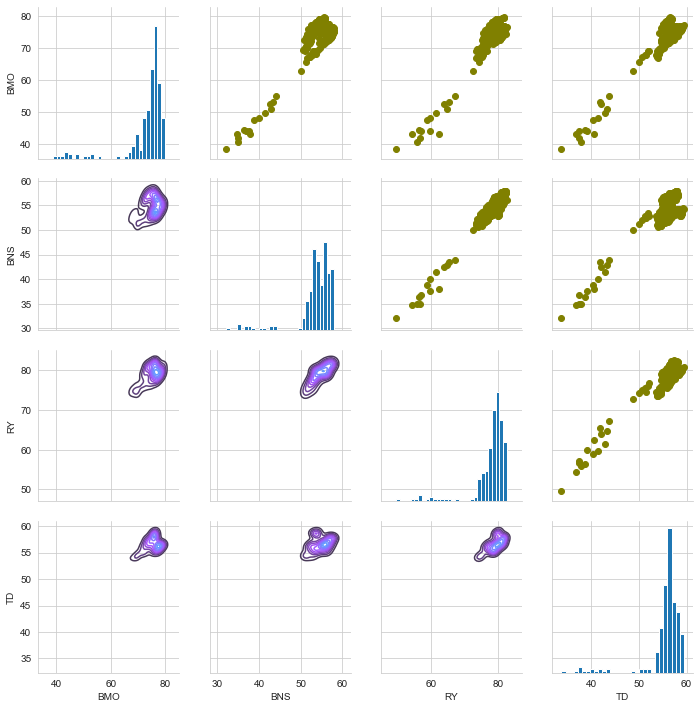

In [38]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='olive')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

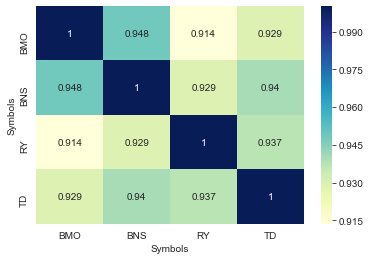

In [39]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(bank_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

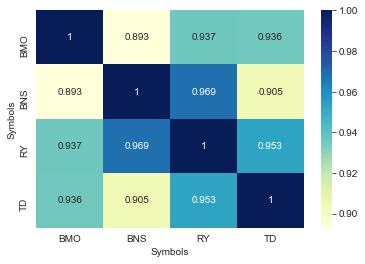

In [40]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In our PairPlot although all banks stocks are highly correlated, the BMO and NSA numerically and visually have the strongest correlation of daily stock return.

#### Risk Analysis

In [41]:
# Let's start by defining a new DataFrame as a cleaned version of the oriignal bank_returns DataFrame
cbank = bank_returns.dropna()

In [42]:
#Showing the head of the cbank dataframe
cbank.head()

Symbols,BMO,BNS,RY,TD
Date,,,,
2019-04-01,0.018578,0.001689,0.018531,0.022087
2019-04-02,0.004068,-0.006183,0.003639,0.002161
2019-04-03,0.000653,0.003771,0.002460,0.003774
2019-04-04,0.000131,0.003005,0.000387,0.002506
2019-04-05,-0.002220,-0.001873,-0.001162,-0.000357


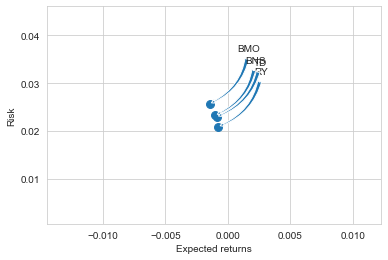

In [43]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(cbank.mean(),cbank.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
#plt.xlim([-0.0025,0.0025])
#plt.ylim([0.001,0.035])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(cbank.columns, cbank.mean(), cbank.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say all of these stocks have similar and slightly negative expected return. The risk is also pretty close.

#### Value at Risk

#### Value at risk using the "bootstrap" method

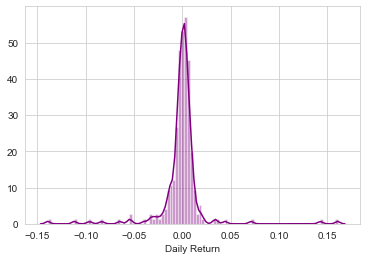

In [44]:
# We should use use dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(TD['Daily Return'].dropna(),bins=100,color='purple')

In [46]:
# The 0.05 empirical quantile of daily returns

# For TD stocks
cbank["TD"].quantile(0.05)

-0.02521135592591167

The 0.05 empirical quantile of daily returns is at -0.025. That means that with 95% confidence, our worst daily loss will not exceed 2.5%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.025 * 1,000,000 = $25,000.

In [48]:
# For RBC stocks
cbank["RY"].quantile(0.05)

-0.02155324269757114

The 0.05 empirical quantile of daily returns is at -0.021. That means that with 95% confidence, our worst daily loss will not exceed 2.1%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.021 * 1,000,000 = $21,000.

In [50]:
# For the Bank of Nova Scotia stocks
cbank["BNS"].quantile(0.05)

-0.01920290971396249

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

In [51]:
# For BMO stocks
cbank["BMO"].quantile(0.05)

-0.027113682122302918

The 0.05 empirical quantile of daily returns is at -0.027. That means that with 95% confidence, our worst daily loss will not exceed 2.7%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.027 * 1,000,000 = $27,000.

#### Value at Risk using the Monte Carlo method

In [52]:
cbank.head()

Symbols,BMO,BNS,RY,TD
Date,,,,
2019-04-01,0.018578,0.001689,0.018531,0.022087
2019-04-02,0.004068,-0.006183,0.003639,0.002161
2019-04-03,0.000653,0.003771,0.002460,0.003774
2019-04-04,0.000131,0.003005,0.000387,0.002506
2019-04-05,-0.002220,-0.001873,-0.001162,-0.000357


In [53]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for TD
mu = cbank.mean()['TD']

# Now let's grab the volatility of the stock from the std() of the average return for TD
sigma = cbank.std()['TD']

In [54]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [55]:
# For TD Stock
TD.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2019-03-29,54.830002,54.240002,54.810001,54.330002,1214300.0,51.548965,NaN,NaN,NaN,NaN,NaN
2019-04-01,55.630001,54.560001,54.750000,55.529999,1447800.0,52.687538,NaN,NaN,NaN,NaN,0.022087
2019-04-02,55.889999,55.400002,55.540001,55.650002,998400.0,52.801395,NaN,NaN,NaN,NaN,0.002161
2019-04-03,56.189999,55.770000,55.910000,55.860001,1200100.0,53.000641,NaN,NaN,NaN,NaN,0.003774
2019-04-04,56.160000,55.810001,55.880001,56.000000,816700.0,53.133476,NaN,NaN,NaN,NaN,0.002506


Text(0.5, 1.0, 'Monte Carlo Analysis for TD')

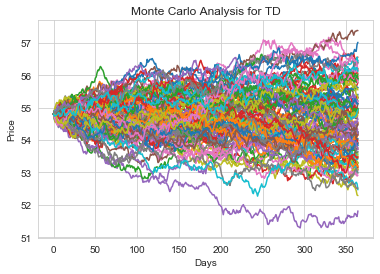

In [63]:
td_start_price = 54.810001

for run in range(100):
    plt.plot(stock_monte_carlo(td_start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for TD')

In [57]:
# For ACB Stock
RY.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-29,76.320000,75.480003,76.190002,75.550003,908800.0,71.764290
2019-04-01,77.010002,75.760002,76.129997,76.949997,759900.0,73.094131
2019-04-02,77.330002,76.639999,76.940002,77.230003,681700.0,73.360107
2019-04-03,77.930000,77.300003,77.500000,77.419998,648900.0,73.540573
2019-04-04,77.690002,77.230003,77.379997,77.449997,406100.0,73.569077


Text(0.5, 1.0, 'Monte Carlo Analysis for RBC')

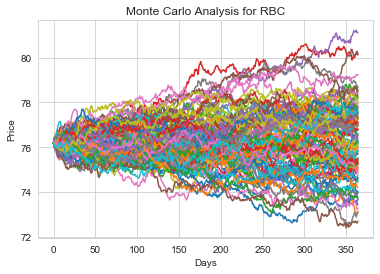

In [64]:
ry_start_price = 76.190002


for run in range(100):
    plt.plot(stock_monte_carlo(ry_start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for RBC')

In [59]:
# For tthe Bank of Nova Scotia Stock
BNS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-29,53.590000,53.189999,53.549999,53.279999,1079100.0,49.955502
2019-04-01,53.480000,52.860001,53.080002,53.369999,856700.0,50.870537
2019-04-02,53.430000,52.869999,53.349998,53.040001,834000.0,50.555992
2019-04-03,53.490002,53.119999,53.240002,53.240002,620100.0,50.746632
2019-04-04,53.590000,53.150002,53.240002,53.400002,941000.0,50.899136


Text(0.5, 1.0, 'Monte Carlo Analysis for BNS')

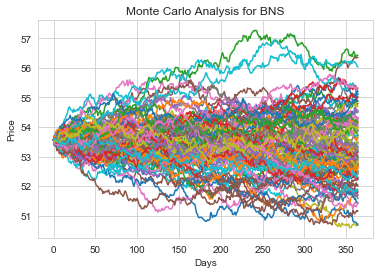

In [66]:
bns_start_price = 53.549999

for run in range(100):
    plt.plot(stock_monte_carlo(bns_start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for BNS')

In [61]:
# For BMO Stock
BMO.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-29,75.639999,74.650002,75.639999,74.820000,463100.0,70.898056
2019-04-01,76.239998,75.139999,75.540001,76.209999,598100.0,72.215202
2019-04-02,76.669998,75.980003,76.279999,76.519997,574100.0,72.508949
2019-04-03,77.040001,76.570000,76.800003,76.570000,474300.0,72.556328
2019-04-04,76.879997,76.430000,76.570000,76.580002,399600.0,72.565811


Text(0.5, 1.0, 'Monte Carlo Analysis for BMO')

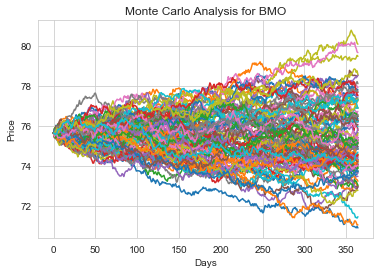

In [67]:
bmo_start_price = 75.639999

for run in range(100):
    plt.plot(stock_monte_carlo(bmo_start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for BMO')

Getting a histogram of the end results for a much larger run

In [68]:
# Lets start with TD stock price


# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(td_start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for TD Stock (TD) after 365 days')

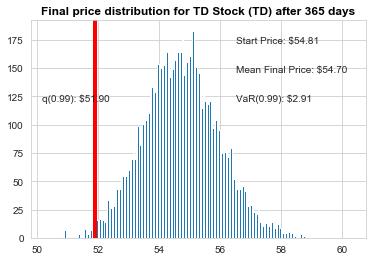

In [72]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % td_start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (td_start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for TD Stock (TD) after %s days" % days, weight='bold', color='black')

Value at Risk for the TD, which looks to be $2.91 for every investment of 54.81 (The price of one initial CGC Stock).

In [74]:
# Lets start with RBC stock price


# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(ry_start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Aurora Cannabis(ACB) after 365 days')

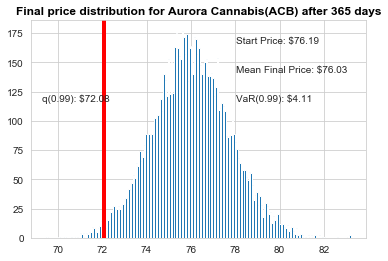

In [76]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % ry_start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (ry_start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title(label="Final price distribution for Aurora Cannabis(ACB) after %s days" % days, weight='bold', color='black')

Value at Risk for the RCB, which looks to be $ 4.11 for every investment of 76.19 (The price of one initial ACB Stock).